In [35]:
## 1. importacion de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
## 2. importacion de los datos
df_productos = pd.read_csv('./files/productos_dia.csv', index_col=0)
df_productos.head()


,url,supermarket,name,description,product_id
2362486,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,9e2fda45e63337294f2a604178823026
2362487,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA lavavajillas máquina premium todo en uno e...,NaN,244994c762813d38881cb118742152a2
2362488,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum azul en cá...,NaN,8a5398b602e44b93a0c0a4a7b9d22b84
2362489,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas máquina platinum plus limón...,NaN,2cd7ea87b1963adb51d8e1295f6c14d3
2362501,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,FAIRY lavavajillas mano concentrado aloe vera ...,NaN,4abac3d30922f81012d7ae0c2cd955f2


In [37]:
df_productos.shape

(11494, 5)

In [38]:
df_precios = pd.read_csv('./files/precios_productos.csv', index_col=0)
df_precios.head()

,price,reference_price,product_id,reference_unit,insert_date
6837303,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
5137438,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00
6005999,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00
6995217,"3,39","5,22",48c959cc94d6d82d1151189b2abe9e83,l,2022-06-19 00:00:00
5760664,"2,79","0,47",8904722366039ba8f147e2e75a5d1ce1,ud,2022-03-25 00:00:00


In [39]:
df_precios.shape

(1000000, 5)

In [40]:
df = df_precios.merge(df_productos,on = "product_id", how="right")
df.sample(5)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
518567,"1,19","3,05",08f652be36c57c4c497c005e069aa454,kg,2022-01-18 00:00:00,https://www.dia.es/compra-online/despensa/desa...,dia-es,DIA mermelada extra de ciruela frasco 390 grs,NaN
83106,"0,69","2,09",ec05d1c7ce1cc90b7a15f4bfacc61dfb,l,2021-11-13 00:00:00,https://www.dia.es/compra-online/bebidas/refre...,dia-es,FANTA limón zero lata 33 cl,NaN
666515,"4,09","4,09",f254d615c39a498e637582203cfe39b9,kg,2022-02-14 00:00:00,https://www.dia.es/compra-online/al-dia/pescad...,dia-es,AGUINAMAR mejillones cocidos envasado al vació...,NaN
643205,"11,65","3,88",697174acbd3baf4c2dc7df5e58ab20bb,kg,2022-04-27 00:00:00,https://www.dia.es/compra-online/mascotas/perr...,dia-es,ULTIMA alimento para perros adultos con pollo ...,NaN
1220412,"6,05","12,1",cefbba332966a66cc870c6c3a74745b9,kg,2022-07-03 00:00:00,https://www.dia.es/compra-online/congelados/re...,dia-es,SAN MARTIN Tarta bombón infantil 1 envase 500 gr,NaN


In [41]:
## cambiar comas por puntos en price y reference_price. cambiar a float
## explorar la cantidad en la descripcion, lo elimino
## cambiar la fecha a datetime, miro si las horas son valores, obtengo el año y el mes por separado. 
## exploracion en general
## si hay valores nulos
## si hay duplicados 

In [42]:
## exploracion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264539 entries, 0 to 1264538
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   price            1264510 non-null  object 
 1   reference_price  1264510 non-null  object 
 2   product_id       1264539 non-null  object 
 3   reference_unit   1262896 non-null  object 
 4   insert_date      1264512 non-null  object 
 5   url              1264539 non-null  object 
 6   supermarket      1264539 non-null  object 
 7   name             1264539 non-null  object 
 8   description      0 non-null        float64
dtypes: float64(1), object(8)
memory usage: 96.5+ MB


In [43]:
df.isnull().sum()

price                   29
reference_price         29
product_id               0
reference_unit        1643
insert_date             27
url                      0
supermarket              0
name                     0
description        1264539
dtype: int64

In [44]:
## eliminar las columnas que no me interesan 
df.drop(columns = ["description"], inplace=True)

In [45]:
## cambiar comas por puntos en price y reference_price. cambiar a float

df['reference_price'].value_counts()


1,99      9503
1,89      6295
5,99      5411
0,99      5247
5,98      4933
          ... 
61,9         1
199,9        1
14,59        1
247,0        1
666,33       1
Name: reference_price, Length: 2876, dtype: int64

In [46]:
columnas = ["price", "reference_price"]
for i in columnas: 
    df[i]= df[i].str.replace(",", ".").astype(float)

In [47]:
df.dtypes

price              float64
reference_price    float64
product_id          object
reference_unit      object
insert_date         object
url                 object
supermarket         object
name                object
dtype: object

In [48]:
## cambiar la fecha a datetime, miro si las horas son valores, obtengo el año y el mes por separado.
df['insert_date']

0          2021-08-14 00:00:00
1          2021-08-17 00:00:00
2          2021-08-02 00:00:00
3          2021-08-08 00:00:00
4          2021-08-18 00:00:00
                  ...         
1264534    2022-01-03 00:00:00
1264535    2022-06-04 00:00:00
1264536    2022-07-01 00:00:00
1264537    2022-01-19 00:00:00
1264538    2022-02-13 00:00:00
Name: insert_date, Length: 1264539, dtype: object

In [49]:
## si lo quiero eliminar la hora 
df["date"] = df["insert_date"].str.split(" ").str[0]
df.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18


In [50]:
df["date"]= pd.to_datetime(df["date"]) 
df.dtypes 

price                     float64
reference_price           float64
product_id                 object
reference_unit             object
insert_date                object
url                        object
supermarket                object
name                       object
date               datetime64[ns]
dtype: object

In [51]:
df['year']= df["date"].dt.year
df.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,year
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14,2021.0
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17,2021.0
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02,2021.0
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08,2021.0
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18,2021.0


In [52]:
df.duplicated().sum()
#3 eliminar filas basado en el duplicado de una columna
##df.drop_duplicates(subset = "product_id", keep = "first", inplace = True)

0

In [53]:
df.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,year
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14,2021.0
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17,2021.0
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02,2021.0
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08,2021.0
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18,2021.0


In [54]:
df.shape

(1264539, 10)

In [55]:
## Analisis de las categorias y subcategorias
df["url"][0]


'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/181184'

In [58]:
df["url"][1700]

'https://www.dia.es/compra-online/cuidado-del-hogar-de-limpieza/hogar/p/199790'

In [60]:
def extrar_categoria (url): 
    partes = url.split("/")
    try:
        categoria = partes[4]
        subcategoria = partes[5]
        return pd.Series([categoria, subcategoria])   
    except:
        return pd.Series([None, None])



In [61]:
df[["categoria", "subcategoria"]] = df["url"].apply(extrar_categoria)
df.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,year,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-14,2021.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-17,2021.0,cuidado-del-hogar,lavavajillas
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-02,2021.0,cuidado-del-hogar,lavavajillas
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-08 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-08,2021.0,cuidado-del-hogar,lavavajillas
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-18 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,2021-08-18,2021.0,cuidado-del-hogar,lavavajillas


In [65]:
df["categoria"].unique()

array(['cuidado-del-hogar', 'cuidado-del-hogar-de-limpieza', 'mascotas',
       'platos-preparados', 'al-dia', 'despensa', 'bebidas', 'bodega',
       'bebe', 'congelados', 'cuidado-personal', 'eco', 'caducidad',
       'peso', 'frescos', 'dulces-de-navidad', 'bulto-mixto',
       'desayunos-y-dulces', 'clasificacion-de-categorias',
       'cuidado-corporal', 'conservas'], dtype=object)

In [66]:
df["subcategoria"].unique()

array(['lavavajillas', 'bano', 'perros', 'hogar', 'ambientadores',
       'calzado', 'insecticidas', 'gatos', 'nuestra-cocina-al-dia',
       'gazpachos-y-salmorejos', 'charcuteria-y-quesos',
       'desayunos-y-dulces', 'conservas', 'pastas-harinas-y-masas',
       'aceites-vinagres-y-alinos', 'cocina-internacional',
       'bebidas-isotonicas-y-energeticas', 'espumosos', 'panales',
       'utensilios-de-limpieza', 'dieteticos', 'helados', 'afeitado',
       'botiquin', 'depilacion', 'bano-e-higiene-personal',
       'cuidado-bucal', 'cuidado-corporal', 'toallitas', 'cuidado-intimo',
       'cuidado-del-bebe', 'sopas', 'pan', 'sal-y-especias',
       'cuidado-de-la-ropa', 'pescado-y-marisco', 'cocina', 'aguas',
       'refrescos', 'cervezas', 'zumos', 'batidos-y-horchata', 'vino',
       'vinos-de-mesa-sangrias-y-tintos-de-verano', 'alcoholes', 'frutas',
       'aperitivos', 'pescado', 'verduras', 'bocadillos-y-sandwich',
       'carne', 'croquetas-y-aperitivos', 'verduras-y-hortaliza

In [69]:
# ¿Qué categoría es la que vende más productos? 
df.groupby(['categoria']).count()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,date,year,subcategoria
categoria,,,,,,,,,,,
al-dia,96411,96411,96413,96411,96411,96413,96413,96413,96411,96411,96413
bebe,38162,38162,38162,38162,38162,38162,38162,38162,38162,38162,38162
bebidas,94660,94660,94660,94660,94660,94660,94660,94660,94660,94660,94660
bodega,51895,51895,51895,51895,51895,51895,51895,51895,51895,51895,51895
bulto-mixto,468,468,468,468,468,468,468,468,468,468,468
caducidad,473,473,473,473,473,473,473,473,473,473,473
clasificacion-de-categorias,429,429,429,429,429,429,429,429,429,429,429
congelados,52580,52580,52582,52521,52580,52582,52582,52582,52580,52580,52582
conservas,289,289,289,289,289,289,289,289,289,289,289


In [73]:
df['categoria'].value_counts()

desayunos-y-dulces         166791
bano-e-higiene-personal     95560
charcuteria-y-quesos        93967
lacteos-y-huevos            67290
cuidado-corporal            55981
                            ...  
limpieza-facial               135
mazapanes                     111
cuidado-del-hogar              78
roscones-de-reyes              41
calendario-de-adviento         26
Name: subcategoria, Length: 96, dtype: int64

In [71]:
# lo mismo que el count pero sin contar por cada columna
df_categoria = df.groupby(["categoria"]).size().reset_index()
df_categoria.columns = ["categoria", "conteo"]
df_categoria.sort_values(by ="conteo", inplace=True, ascending = False)
df_categoria.head(2)

,categoria,conteo
14,despensa,434676
12,cuidado-personal,212626


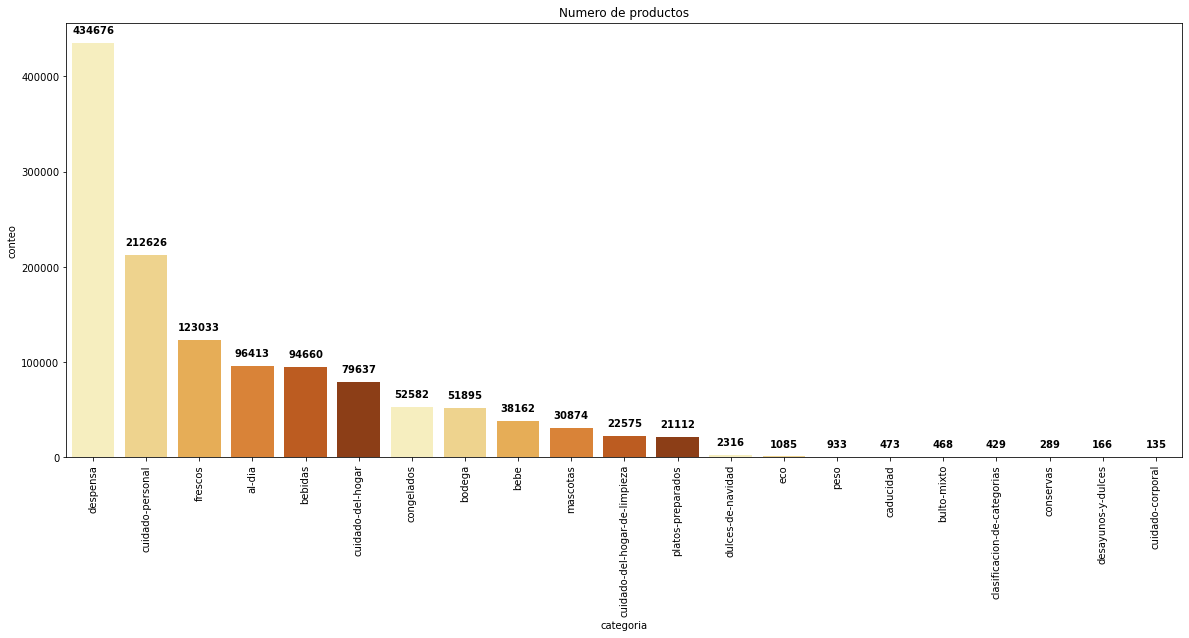

In [72]:
# Como lo veríamos visualmente

plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
sns.barplot(data = df_categoria, x = "categoria", y = "conteo", palette=sns.color_palette("YlOrBr")) 
plt.xticks(rotation=90) # para girar las etiquetas del eje-x
plt.title("Numero de productos")

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_categoria["conteo"]):
    plt.text(indice, valor + 10000, str(valor),
             horizontalalignment='center', # para colocarlo en el centro de la barra
             fontweight = "bold") ; 

plt.show();

In [77]:
# # 3. Dentro de cada categoría, ¿qué subcategorías son más populares? 
df_categoria_subcatgoria = df.groupby(["categoria", "subcategoria"]).size().reset_index()
df_categoria_subcatgoria



,categoria,subcategoria,0
0,al-dia,carne,18572
1,al-dia,charcuteria-y-quesos,44140
2,al-dia,frutas,9066
3,al-dia,pescado-y-marisco,7603
4,al-dia,verduras-y-hortalizas,17032
...,...,...,...
106,platos-preparados,pastas-y-arroces,1448
107,platos-preparados,pescado,1422
108,platos-preparados,pizzas-refrigeradas,3937
109,platos-preparados,tortillas,1009


In [78]:

df_categoria_subcatgoria.rename(columns={0:"conteo"}, inplace=True)
df_categoria_subcatgoria.sort_values(by ="conteo", inplace=True, ascending = False)
df_categoria_subcatgoria.head(2)

,categoria,subcategoria,conteo
67,despensa,desayunos-y-dulces,166791
54,cuidado-personal,bano-e-higiene-personal,95560


In [80]:
#¿Qué categoría es la que tiene los precios más altos? ¿y los mínimos? ¿Cuál es su media? 
df.groupby(['categoria'])["price"].agg(["max", "min", "mean"])


,max,min,mean
categoria,,,
al-dia,135.00,0.18,3.704284
bebe,25.74,0.75,4.662929
bebidas,14.99,0.15,1.711525
bodega,33.84,0.65,6.331031
bulto-mixto,3.19,1.25,2.019679
caducidad,3.29,0.95,1.952918
clasificacion-de-categorias,3.25,0.68,2.118089
congelados,22.89,0.49,3.116007
conservas,4.75,3.19,4.188235


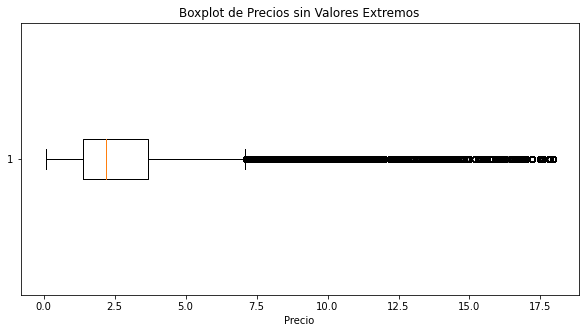

In [86]:
## ¿Existen productos con precios fuera de lo común (outliers)?
# Graficar boxplot sin los valores extremos
plt.figure(figsize=(10, 5))
plt.boxplot(filtered_df['price'], vert=False)
plt.title("Boxplot de Precios sin Valores Extremos")
plt.xlabel("Precio")
plt.show()

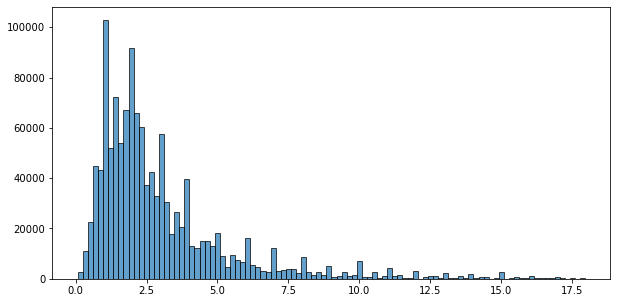

In [85]:
## histograma
plt.figure(figsize=(10, 5))
plt.hist(filtered_df['price'], bins=100, edgecolor='black', alpha=0.7);

In [84]:
percentil_99 = df['price'].quantile(0.99)
filtered_df = df[df['price'] < percentil_99]

In [ ]:
sns.scatterplot(data=df, x='product_id', y='price', size = 3, color = 'purple')

In [89]:
## - ¿Cuántos productos tienen un precio superior al precio de referencia?
productos_mas_caro= df[df["price"] > df["reference_price"]]
productos_mas_caro.shape[0]

194374

In [95]:
## - ¿Qué categorías de productos tienen la mayor y menor variación de precios?
variacion_precios = df.groupby("categoria")["price"].std().reset_index()
variacion_precios.columns = ["categoria", "std"]
variacion_precios.sort_values(by = "std", inplace=True, ascending = False)
variacion_precios.head(2)

,categoria,std
17,frescos,17.601474
0,al-dia,8.780750


In [96]:
variacion_precios.tail(2)

,categoria,std
13,desayunos-y-dulces,0.031933
9,cuidado-corporal,0.000000


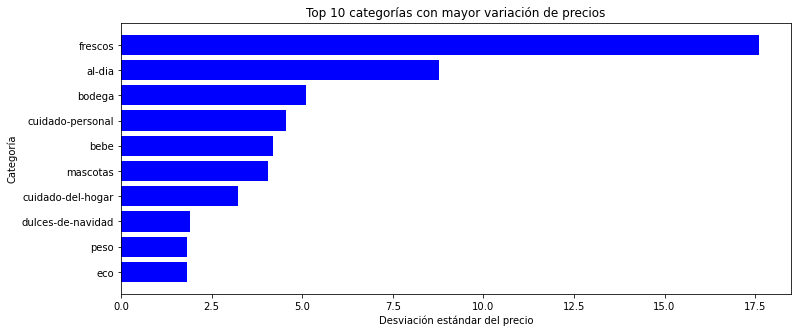

In [99]:
# Graficar las 10 categorías con mayor variación de precios
plt.figure(figsize=(12, 5))
plt.barh(variacion_precios['categoria'].head(10), variacion_precios['std'].head(10), color='blue')
plt.xlabel("Desviación estándar del precio")
plt.ylabel("Categoría")
plt.title("Top 10 categorías con mayor variación de precios")
plt.gca().invert_yaxis()  # Invertir el eje Y para mejor visualización
plt.show()


<AxesSubplot:xlabel='date', ylabel='price'>

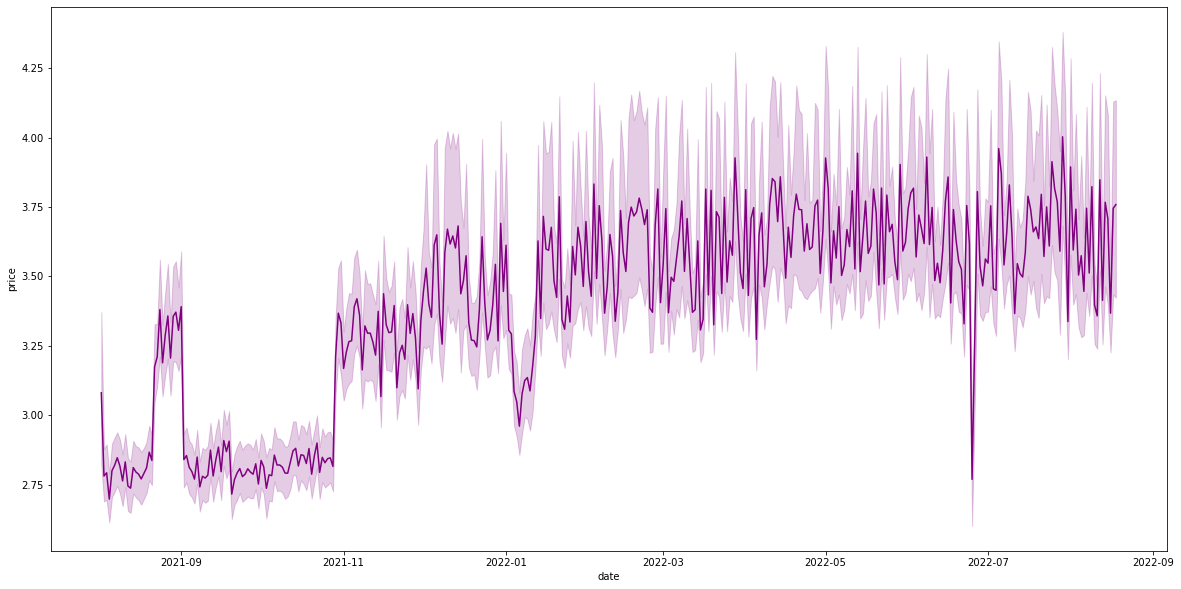

In [101]:
#¿Cómo varían los precios de los productos a lo largo del tiempo?
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='date', y='price', color='purple') 



In [105]:
# ¿Qué productos tienen más registros de precios?
productos_mas_precios = df["product_id"].value_counts().reset_index()
productos_mas_precios.columns = ["product_id", "conteo"]
productos_mas_precios

,product_id,conteo
0,cd3f6bc51b2d934c1e46b0136ed62779,1384
1,5d2d1ed4575049c5cf5bea27ea6bad2c,1225
2,17c01da71d8e7a36cf32fd6f34f29625,1068
3,2f268ae7ec6b26d49f1f463c4dd49244,1020
4,b9c8b94b603a4b69e4454717730eab8c,930
...,...,...
9491,2ac5a1180509afe6b2e3f6655158c2df,1
9492,5b28c399fa01243e79c97e829fbacbe6,1
9493,f569c92042bddd64e6e4ca7f4d941bfd,1
9494,ca4250c450fdc932d403fba9de1fb42f,1


In [108]:
#- ¿Cuántos productos distintos hay en el dataset?

num_productos = df["product_id"].unique()
num_productos.shape[0]
print(len(num_productos))

9496


In [112]:
## ¿Existen productos en el dataset de precios que no tienen información en el dataset de productos?
## tienen el precio pero no tiene producto
productos_unicos = set(df_productos["product_id"])
precios_unicos= set(df_precios["product_id"])
productos_sininfo = precios_unicos- productos_unicos
print(len(productos_sininfo))
productos_sininfo


0


set()

In [113]:
#- ¿Cuál es el precio medio por unidad de referencia de cada producto?
precio_medio = df.groupby("reference_unit")["price"].mean().reset_index()
precio_medio.columns = ["reference_unit", "mean_price"]
precio_medio

,reference_unit,mean_price
0,kg,2.936545
1,l,3.745480
2,lavado,6.620565
3,m,2.168132
4,ud,4.301429


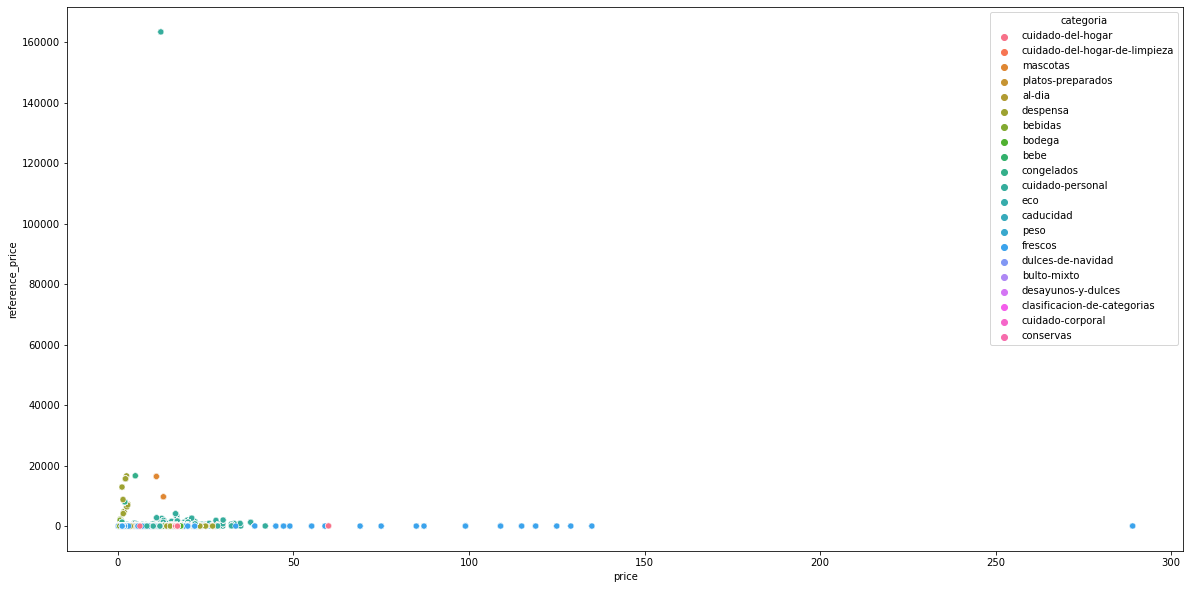

In [116]:
##Relación entre precios, referencia de precios y categorías
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x = "price", y = "reference_price",  hue = "categoria");

In [117]:
df[["price", "reference_price"]].corr()

,price,reference_price
price,1.00000,0.02459
reference_price,0.02459,1.00000
